# The Simple Harmonic Oscillator

A simple two dimensional nonlinear system. The system equations are:

$\frac{dx_{1}}{dt}= x_{2}$,

$\frac{dx_{2}}{dt}= -\omega ^{2}x_{1}$

In [29]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
h = 0.05 #time step of integration
N = 10000 #number of iterations

In [44]:
#define a function that takes t, x1 and x2 as input

#for x1
def f(t,x2):
    ddx = x2 #actually dx1/dt
    return ddx

#for x2
def g(t,x1,w):
    ddp = -(w**2)*(x1) #dx2/dt
    return ddp


In [45]:
def integrate_RK4(N, h, x10, x20, w0):
    
    #create arrays to store values of variables
    
    t = [h,]
    x1 = [x10,]
    x2 = [x20,]
    
    for i in range (0,N):

        k11 = h*f(t[i], x2[i])
        k21 = h*g(t[i], x1[i], w0)

        k12 = h*f(t[i]+(h/2), x2[i]+0.5*k21)
        k22 = h*g(t[i]+(h/2), x1[i]+0.5*k11, w0)

        k13 = h*f(t[i]+(h/2), x2[i]+0.5*k22)
        k23 = h*g(t[i]+(h/2), x1[i]+0.5*k12, w0)

        k14 = h*f(t[i]+h, x2[i]+k23)
        k24 = h*g(t[i]+h, x1[i]+k13, w0)


        x1.append(x1[i]+(1/6)*(k11+2*k12+2*k13+k14))
        x2.append(x2[i]+(1/6)*(k21+2*k22+2*k23+k24))
        t.append(t[i] + h)
        
    return t, x1, x2

In [49]:
#to plot the results
def plot_phase_space(w):
    time,x,y = integrate_RK4(N, h, x10, x20, w)
    #np.savetxt('output.dat',np.array([time,x,y]))
    plt.figure(1)
    plt.plot(x,y)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p_{x}$')
    #plt.savefig('p_vs_x.jpg')
    
    plt.figure(2).set_size_inches(10,5)
    plt.plot(time,x)
    plt.xlabel('time')
    plt.ylabel(r'$x$')
    #plt.xlim(0,1000)
    plt.show()
    #plt.savefig('x2_vs_time.jpg')
    
    return time,x,y

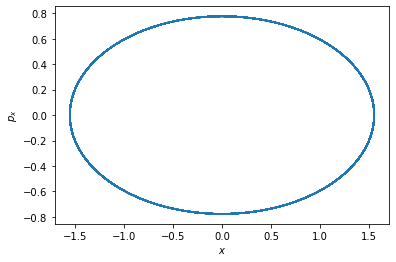

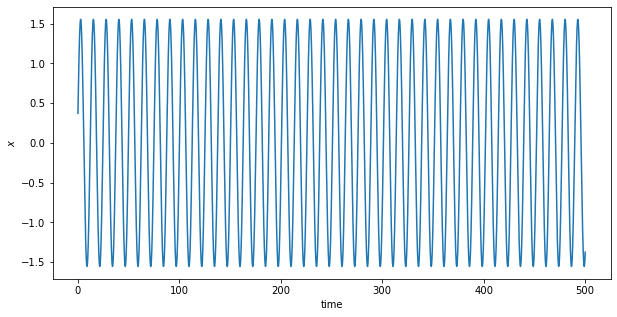

In [50]:
x10,x20 = np.random.rand(2) #initial conditions

w1 = 0.5 #angular frequency

t,x,y = plot_phase_space(w1) 